In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV , train_test_split
from tqdm import tqdm_notebook
import warnings
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc
import gc
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='whitegrid', palette='inferno', font_scale=1.5)

In [3]:
dataset = pd.read_csv('creditcard.csv')

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


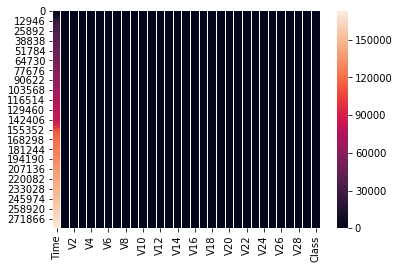

In [6]:
sns.heatmap(dataset)

In [45]:
fraud = dataset[dataset['Class'] == 1]
normal= dataset[dataset['Class'] == 0]
fraud.shape, normal.shape

((492, 31), (284315, 31))

### No missing values

Text(0.5,1,'Normal Cases')

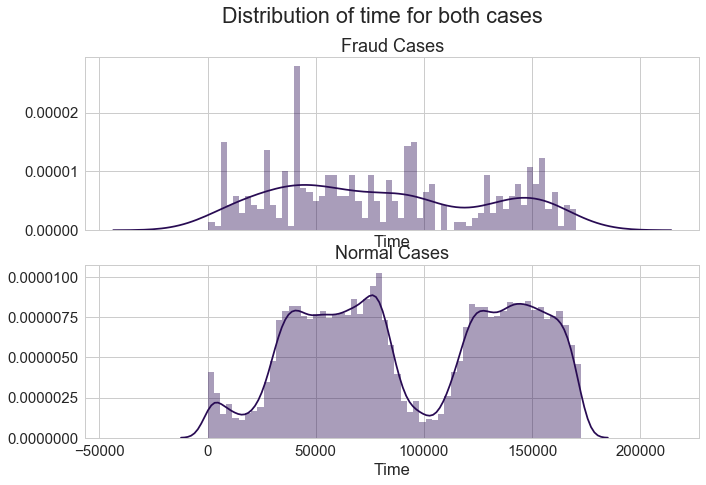

In [66]:
fig,axes = plt.subplots(nrows=2,ncols=1, sharex= True, figsize = (11,7))
fig.suptitle('Distribution of time for both cases')
sns.distplot(fraud['Time'], ax = axes[0], bins = 60)
axes[0].set_title("Fraud Cases")
sns.distplot(normal['Time'], ax = axes[1], bins = 60)
axes[1].set_title("Normal Cases")

### We can see that fraud & normal cases cannot be separated on the basis of time

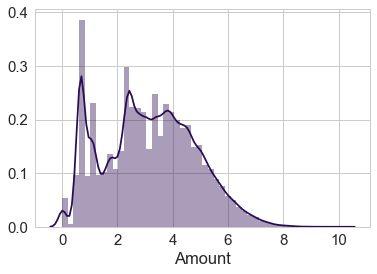

In [67]:
sns.distplot(np.log1p(dataset['Amount']))

### The distribution of Amount is right skewed. Transformation required!!!

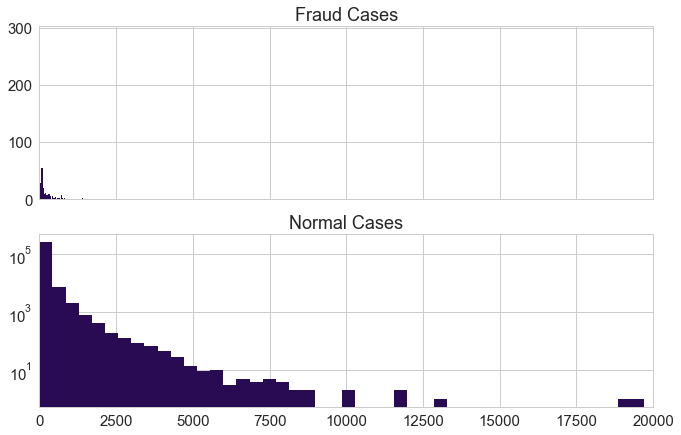

In [68]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize = (11,7), sharex= True)
ax1.hist(fraud['Amount'], bins = 60)
ax1.set_title("Fraud Cases")
ax2.hist(normal['Amount'], bins= 60)
ax2.set_title("Normal Cases")
plt.xlim(0,20000)
plt.yscale('log')

### Amount is smaller for fradulent cases

In [69]:
n_data = dataset.drop(['Class', 'Time'], axis = 1)
ss = StandardScaler()
scaled_data=  pd.DataFrame(ss.fit_transform(n_data), columns = n_data.columns)

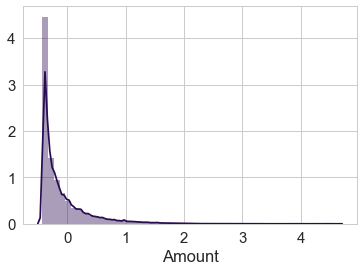

In [80]:
sns.distplot(np.log1p(scaled_data.iloc[:,28]))

### The dataset has been standardized.

In [71]:
# This is the standardized data set.
scaled_data['Class'] = dataset['Class']
X = scaled_data.drop('Class', axis= 1)
y = scaled_data['Class']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

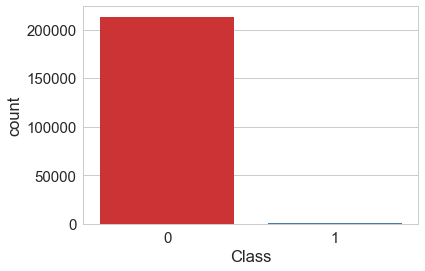

In [78]:
sns.countplot(y_train, palette= 'Set1')

### The dataset is imbalanced!!!

In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio = 'minority', random_state= 101)
X_sm, y_sm = sm.fit_sample(X_train,y_train)

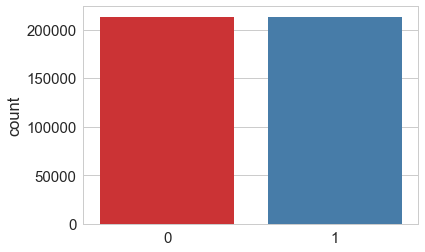

In [77]:
sns.countplot(x = y_sm, palette= 'Set1')

In [71]:
def score(model, test = X_test, y_true = y_test):
    
    pred = model.predict(test)

    print('Average precision-recall score RF:\t', round(average_precision_score(y_true, pred),4)*100)
    print('\n')
    print("Area Under ROC Curve:\t",round(roc_auc_score(y_true,pred),4)*100)
    print('\n')
    print(classification_report(y_true,pred))
    precision, recall, _ = precision_recall_curve(y_true, pred)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(y_true, pred)))
    
    
    
#     fpr_rf, tpr_rf, _ = roc_curve(y_true, pred)
#     roc_auc_rf = auc(fpr_rf, tpr_rf)
#     plt.figure(figsize=(8,8))
#     plt.xlim([-0.01, 1.00])
#     plt.ylim([-0.01, 1.01])
#     plt.step(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
#     #plt.fill_between(fpr_rf, tpr_rf, step='post', alpha=0.2, color='b')


#     plt.xlabel('False Positive Rate', fontsize=16)
#     plt.ylabel('True Positive Rate', fontsize=16)
#     plt.title('ROC curve', fontsize=16)
#     plt.legend(loc='lower right', fontsize=13)
#     plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
#     plt.axes().set_aspect('equal')
#     plt.show()

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr_model = LogisticRegression(random_state= 101, max_iter= 500)

In [87]:
lr_model.fit(X_sm,y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Average precision-recall score RF:	 5.43


Area Under ROC Curve:	 94.39999999999999


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71074
           1       0.06      0.91      0.11       128

   micro avg       0.97      0.97      0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.99     71202



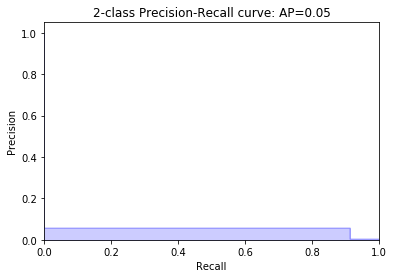

In [88]:
score(lr_model)

## DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dctree = DecisionTreeClassifier(random_state= 101)

In [69]:
dctree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

Average precision-recall score RF:	 54.17999999999999


Area Under ROC Curve:	 87.47


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.72      0.75      0.74       128

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.86      0.87      0.87     71202
weighted avg       1.00      1.00      1.00     71202



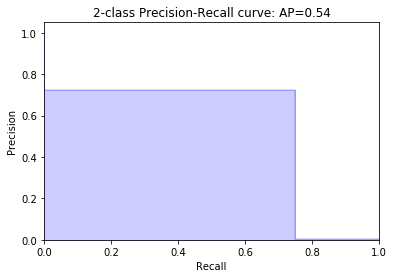

In [73]:
score(dctree)

## RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(n_estimators= 500,verbose=1,n_jobs = -1, random_state= 101)

In [78]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=101, verbose=1, warm_start=False)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


Average precision-recall score RF:	 74.44


Area Under ROC Curve:	 89.05999999999999


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.95      0.78      0.86       128

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



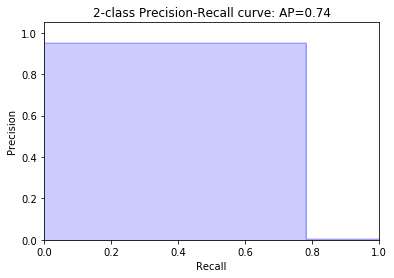

In [79]:
score(rf)

## XGboost

In [80]:
from xgboost import XGBClassifier

In [81]:
xgb  = XGBClassifier(random_state = 101, n_jobs= -1)

In [82]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Average precision-recall score RF:	 74.61


Area Under ROC Curve:	 89.84


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.94      0.80      0.86       128

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



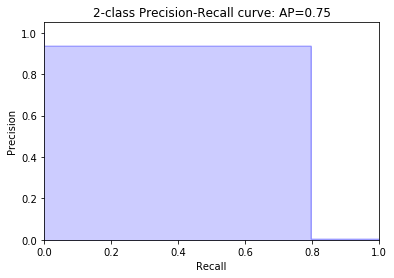

In [84]:
score(xgb)

### Till now best Precision Recall Score of ~74 & Area Under ROC Curve ~ 89
### Lets try preparing train data using sampling

In [82]:
fraud_cases = scaled_data[scaled_data['Class'] == 1]
normal_cases = scaled_data[scaled_data['Class'] == 0]

In [83]:
normal_cases = normal_cases.sample(n = len(fraud_cases)*3,random_state= 101)

In [84]:
resampled = pd.concat([fraud_cases, normal_cases])

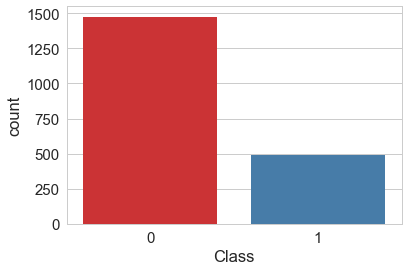

In [85]:
sns.countplot(resampled['Class'], palette= 'Set1')

In [93]:
X = scaled_data.drop('Class', axis= 1)
y = scaled_data['Class']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [95]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=101, verbose=1, warm_start=False)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.4s finished


Average precision-recall score RF:	 92.22


Area Under ROC Curve:	 96.87


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.98      0.94      0.96       128

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.99      0.97      0.98     71202
weighted avg       1.00      1.00      1.00     71202



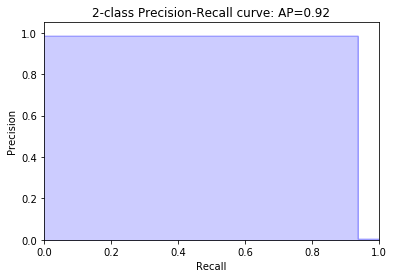

In [96]:
score(rf)

### Achieved a Average precision-recall score = 92.22 & Area Under ROC Curve: 96.87